In [485]:
# Run reviews_exploratiion.ipynb first.
import pandas as pd
import json
import ast
import numpy as np
import math
import missingno as msno
import statsmodels.api as sm
import seaborn as sns
import matplotlib.pyplot as plt
from stargazer.stargazer import Stargazer

In [486]:
# Import data.
games_returns_release_df = pd.read_csv('games_returns_release_date.csv')
games_returns_release_df.head()

,Unnamed: 0.1,name,mature,single_player,multiplayer,dist,hasLootBoxes,percentRecommended,numReviews,numTopCriticReviews,...,excess_return,NOKUSD,GBPUSD,JPYUSD,SEKUSD,PLNUSD,EURUSD,market_cap,mkt_cap_usd,volume_to_shares_outstanding
0,0,The Last Guardian,False,True,False,0.0,False,70.491803,128.0,96.0,...,-0.022378,0.119329,1.27050,0.008741,0.109188,0.238425,1.07250,3.991704e+12,3.489148e+10,0.005334
1,1,Empire of Sin,True,True,False,0.0,False,27.118644,60.0,40.0,...,0.037110,0.112910,1.33505,0.009590,0.116962,0.266809,1.19620,2.785728e+10,3.258243e+09,0.001424
2,4,One Punch Man: A Hero Nobody Knows,False,True,True,0.0,False,17.105263,76.0,52.0,...,0.037230,0.106388,1.28735,0.009092,0.103612,0.254278,1.09860,1.254300e+12,1.140410e+10,0.005621
3,6,Hatsune Miku: Project Diva Mega Mix,False,True,False,0.0,False,79.166667,48.0,30.0,...,0.008737,0.108018,1.30540,0.009106,0.103412,0.255057,1.08485,4.209088e+11,3.832796e+09,0.002410
4,7,Hatsune Miku: Project Diva Mega Mix,False,True,False,0.0,False,79.166667,48.0,30.0,...,0.008737,0.108018,1.30540,0.009106,0.103412,0.255057,1.08485,4.209088e+11,3.832796e+09,0.002410


In [487]:
games_returns_release_df['hasLootBoxes'] = games_returns_release_df['hasLootBoxes'].astype(bool)

In [488]:
# Check columns for columns that can be dropped.
games_returns_release_df.columns

Index(['Unnamed: 0.1', 'name', 'mature', 'single_player', 'multiplayer',
       'dist', 'hasLootBoxes', 'percentRecommended', 'numReviews',
       'numTopCriticReviews', 'medianScore', 'topCriticScore', 'percentile',
       'developer', 'publisher', 'stock_id', 'date', 'Unnamed: 0', 'gvkey',
       'iid', 'company_name', 'shares_outstanding', 'trading_volume',
       'closing_price', 'eu', 'jp', 'us', 'mkt-rf', 'smb', 'hml', 'rmw', 'cma',
       'rf', 'benchmark_price', 'returns', 'benchmark_returns',
       'excess_return', 'NOKUSD', 'GBPUSD', 'JPYUSD', 'SEKUSD', 'PLNUSD',
       'EURUSD', 'market_cap', 'mkt_cap_usd', 'volume_to_shares_outstanding'],
      dtype='object')

In [489]:
games_returns_release_df.dtypes

Unnamed: 0.1                      int64
name                             object
mature                             bool
single_player                      bool
multiplayer                        bool
dist                            float64
hasLootBoxes                       bool
percentRecommended              float64
numReviews                      float64
numTopCriticReviews             float64
medianScore                     float64
topCriticScore                  float64
percentile                      float64
developer                          bool
publisher                          bool
stock_id                         object
date                             object
Unnamed: 0                      float64
gvkey                           float64
iid                              object
company_name                     object
shares_outstanding              float64
trading_volume                  float64
closing_price                   float64
eu                                 bool


In [490]:
# Drop unused columns.
games_returns_release_df = games_returns_release_df.drop([
    'Unnamed: 0.1',
    'Unnamed: 0',
    'iid',
    'gvkey',
    'shares_outstanding',
    'market_cap',
    'benchmark_price',
    'closing_price',
    'trading_volume',
    'returns',
    'NOKUSD',
    'GBPUSD',
    'JPYUSD',
    'SEKUSD',
    'PLNUSD',
    'EURUSD',
    'market_cap',
    'benchmark_returns'
    ], axis=1)

games_returns_release_df.head()

,name,mature,single_player,multiplayer,dist,hasLootBoxes,percentRecommended,numReviews,numTopCriticReviews,medianScore,...,us,mkt-rf,smb,hml,rmw,cma,rf,excess_return,mkt_cap_usd,volume_to_shares_outstanding
0,The Last Guardian,False,True,False,0.0,False,70.491803,128.0,96.0,85.0,...,False,-0.99,0.35,0.03,0.11,0.19,0.00,-0.022378,3.489148e+10,0.005334
1,Empire of Sin,True,True,False,0.0,False,27.118644,60.0,40.0,62.5,...,False,-1.10,0.47,-1.31,0.02,-0.63,0.00,0.037110,3.258243e+09,0.001424
2,One Punch Man: A Hero Nobody Knows,False,True,True,0.0,False,17.105263,76.0,52.0,60.0,...,False,-1.63,-0.86,0.56,-0.49,0.33,0.01,0.037230,1.140410e+10,0.005621
3,Hatsune Miku: Project Diva Mega Mix,False,True,False,0.0,False,79.166667,48.0,30.0,80.0,...,False,-0.04,0.14,-0.56,0.34,-0.39,0.01,0.008737,3.832796e+09,0.002410
4,Hatsune Miku: Project Diva Mega Mix,False,True,False,0.0,False,79.166667,48.0,30.0,80.0,...,False,-0.04,0.14,-0.56,0.34,-0.39,0.01,0.008737,3.832796e+09,0.002410


In [491]:
games_returns_release_df[['mature',
                          'single_player', 
                          'multiplayer', 
                          'hasLootBoxes', 
                          'developer',
                          'publisher',
                          'eu',
                          'jp',
                          'us']] = games_returns_release_df[['mature',
                          'single_player', 
                          'multiplayer', 
                          'hasLootBoxes', 
                          'developer',
                          'publisher',
                          'eu',
                          'jp',
                          'us']].astype(int)

In [492]:
# Calculate the number of unique games in the study.
games_returns_release_df['name'].unique().shape

(587,)

In [493]:
games_returns_release_df['sizeMedianScore'] = games_returns_release_df['mkt_cap_usd'] * games_returns_release_df['medianScore']
games_returns_release_df['turnoverMedianScore'] = games_returns_release_df['volume_to_shares_outstanding'] * games_returns_release_df['medianScore']
games_returns_release_df['sizeTopCriticScore'] = games_returns_release_df['mkt_cap_usd'] * games_returns_release_df['topCriticScore']
games_returns_release_df['turnoverTopCriticScore'] = games_returns_release_df['volume_to_shares_outstanding'] * games_returns_release_df['topCriticScore']
games_returns_release_df['numMedianScore'] = games_returns_release_df['numTopCriticReviews'] * games_returns_release_df['topCriticScore']
games_returns_release_df['numTopCriticScore'] = games_returns_release_df['numReviews'] * games_returns_release_df['medianScore']

<Axes: >

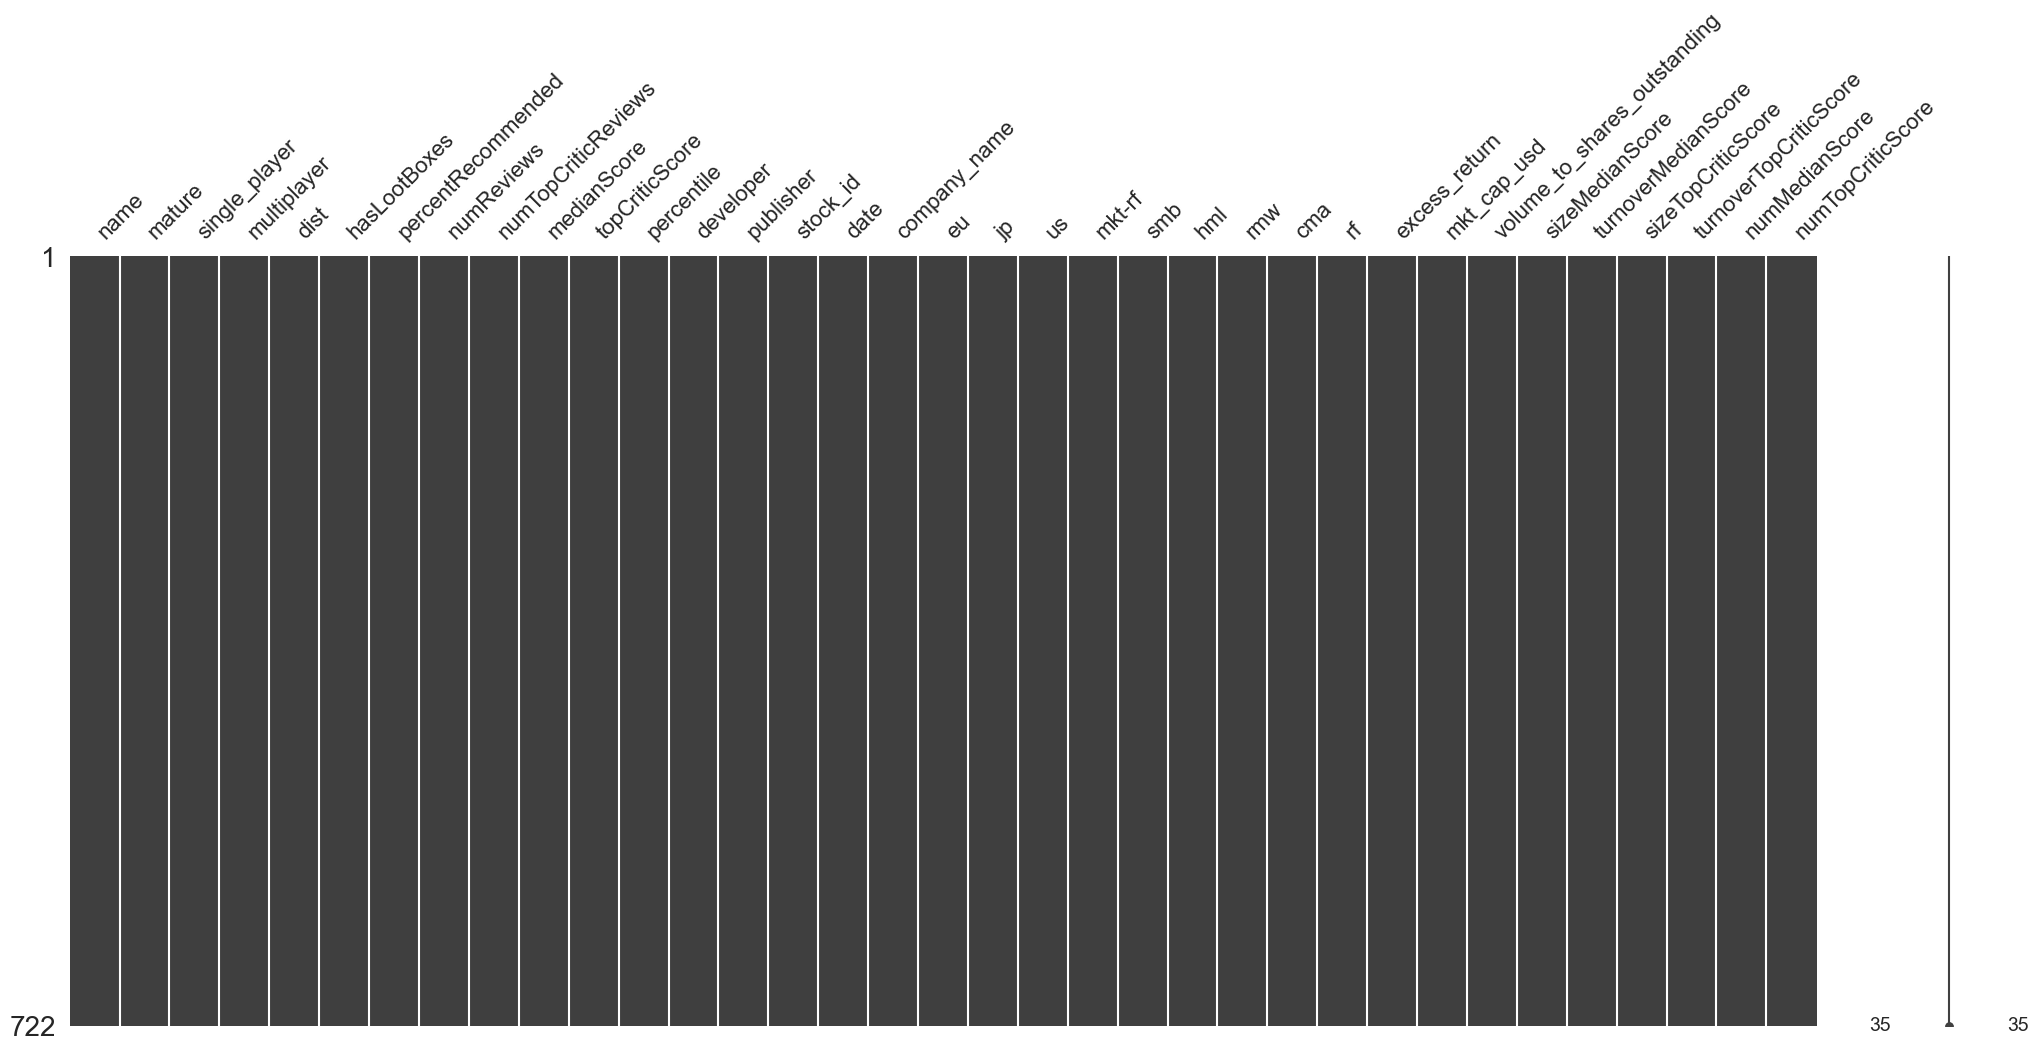

In [494]:
# Plot missing data.
%matplotlib inline

msno.matrix(games_returns_release_df)

In [495]:
def run_ols_model(df, dependent_var, independent_vars):
    X = df[independent_vars]
    Y = df[dependent_var]
    
    X = sm.add_constant(X)
    
    model = sm.OLS(Y, X).fit()
    predictions = model.predict(X)
    
    return model.summary()

In [496]:
games_returns_release_df.columns

Index(['name', 'mature', 'single_player', 'multiplayer', 'dist',
       'hasLootBoxes', 'percentRecommended', 'numReviews',
       'numTopCriticReviews', 'medianScore', 'topCriticScore', 'percentile',
       'developer', 'publisher', 'stock_id', 'date', 'company_name', 'eu',
       'jp', 'us', 'mkt-rf', 'smb', 'hml', 'rmw', 'cma', 'rf', 'excess_return',
       'mkt_cap_usd', 'volume_to_shares_outstanding', 'sizeMedianScore',
       'turnoverMedianScore', 'sizeTopCriticScore', 'turnoverTopCriticScore',
       'numMedianScore', 'numTopCriticScore'],
      dtype='object')

In [497]:
x_df = games_returns_release_df[['mature',
                                'single_player', 
                                'multiplayer', 
                                'hasLootBoxes', 
                                'medianScore',
                                'developer',
                                'publisher',
                                'eu',
                                'jp',
                                'us',
                                'mkt-rf',
                                'smb',
                                'hml',
                                'rmw',
                                'cma',
                                'rf',
                                'mkt_cap_usd']]
x_df.dtypes

mature             int64
single_player      int64
multiplayer        int64
hasLootBoxes       int64
medianScore      float64
developer          int64
publisher          int64
eu                 int64
jp                 int64
us                 int64
mkt-rf           float64
smb              float64
hml              float64
rmw              float64
cma              float64
rf               float64
mkt_cap_usd      float64
dtype: object

In [498]:
results_hic = run_ols_model(games_returns_release_df[(games_returns_release_df['excess_return'] < 3.5) & (games_returns_release_df['numReviews'] > 0)], 'medianScore', ['mature',
                                                   'single_player', 
                                                   'multiplayer', 
                                                   #'hasLootBoxes', 
                                                   'developer',
                                                   'publisher',
                                                   'eu',
                                                   'jp',
                                                   'us',
                                                   'mkt-rf',
                                                   'smb',
                                                   'hml',
                                                   'rmw',
                                                   'cma',
                                                   'rf',
                                                   'mkt_cap_usd'])
print(results_hic)

                            OLS Regression Results                            
Dep. Variable:            medianScore   R-squared:                       0.059
Model:                            OLS   Adj. R-squared:                  0.042
Method:                 Least Squares   F-statistic:                     3.436
Date:                Thu, 08 Jun 2023   Prob (F-statistic):           3.51e-05
Time:                        14:48:41   Log-Likelihood:                -2739.8
No. Observations:                 722   AIC:                             5508.
Df Residuals:                     708   BIC:                             5572.
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const            38.2158      1.269     30.107

In [499]:
def subplot_common_y(df, dependent_var, independent_vars, num_columns, y_label, **kwargs):

    titles = kwargs.get('titles', None)
    x_labels = kwargs.get('x_labels', None)
    y = df[dependent_var]
    suptitle = kwargs.get('suptitle', None)
    colours=kwargs.get('colours')

    # Calculate the number of subplots based on how many X values being compared.
    num_subplots = len(independent_vars)

    rows = math.ceil(num_subplots/num_columns)
    cols = num_columns
    fig, axs = plt.subplots(rows, cols, sharey=True, figsize = (9, 9))
    fig.suptitle(suptitle)

    for i, ax in enumerate(fig.axes):
        try:
            x = df[independent_vars[i]]
            ax.scatter(x, y, s=20, alpha=0.1, edgecolors="k", c='gray')
            if titles != None:
                ax.set_title(titles[i])
            if x_labels != None:
                ax.set_xlabel(x_labels[i])
            if i == 0 or i == 3:
                ax.set_ylabel(y_label)
            b, a = np.polyfit(x, y, deg=1)

            # Create sequence of 100 numbers from 0 to 100 
            xseq = np.linspace(0, max(x), num=100)

            # Plot regression line
            ax.plot(xseq, a + b * xseq, color="r", lw=1)

        except KeyError:
            print('Too many indices.')
            continue
    fig.savefig('review_metrics_regression_plots.png')


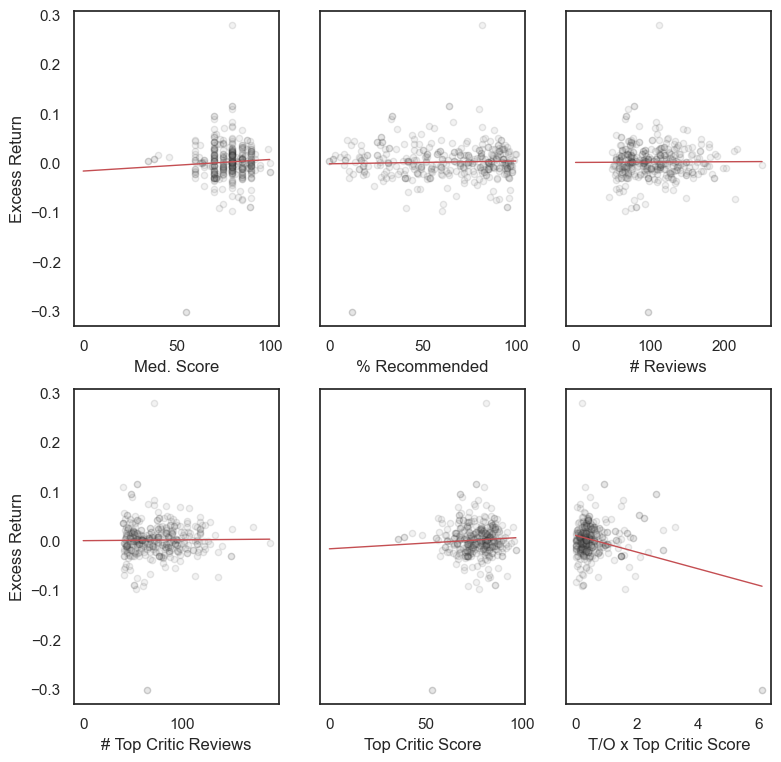

In [545]:
subplot_common_y(
    df=games_returns_release_df[games_returns_release_df['numTopCriticReviews'] > 39],
    dependent_var='excess_return',
    independent_vars=[
        'medianScore',
        'percentRecommended',
        'numReviews',
        'numTopCriticReviews',
        'topCriticScore',
        'turnoverTopCriticScore'
        ],
    num_columns=3,
    x_labels =[
        'Med. Score',
        '% Recommended',
        '# Reviews',
        '# Top Critic Reviews',
        'Top Critic Score',
        'T/O x Top Critic Score'
        ],
    y_label='Excess Return'
  )

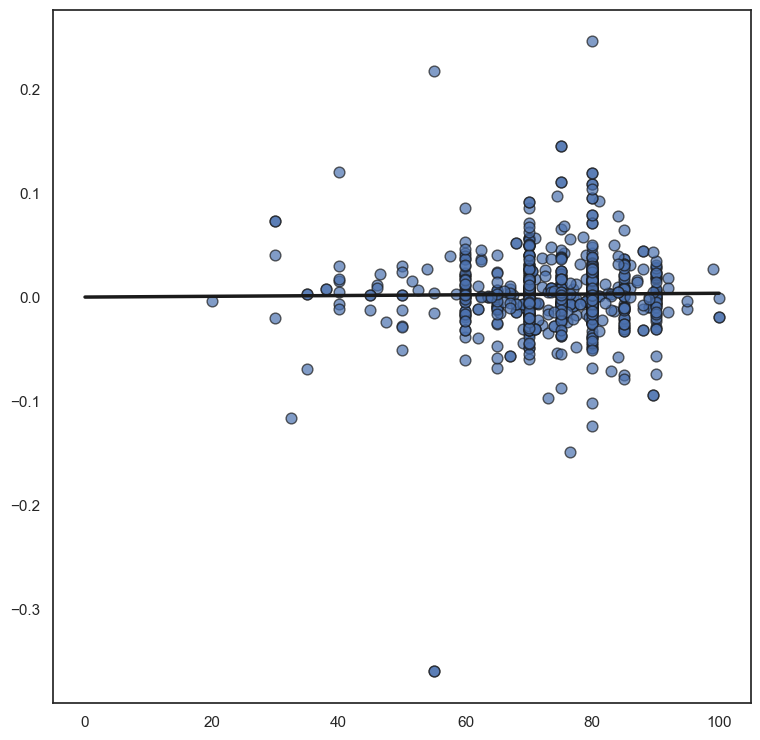

In [501]:
# Generate data
data_df = games_returns_release_df#[(games_returns_release_df['excess_return'] < 3.5) & (games_returns_release_df['numTopCriticReviews'] > 40)]
x = data_df['medianScore']
y = np.log(data_df['excess_return'] + 1)

# Initialize layout
fig, ax = plt.subplots(figsize = (9, 9))

# Add scatterplot
ax.scatter(x, y, s=60, alpha=0.7, edgecolors="k")

# Fit linear regression via least squares with numpy.polyfit
# It returns an slope (b) and intercept (a)
# deg=1 means linear fit (i.e. polynomial of degree 1)
b, a = np.polyfit(x, y, deg=1)

# Create sequence of 100 numbers from 0 to 100 
xseq = np.linspace(0, max(x), num=100)

# Plot regression line
ax.plot(xseq, a + b * xseq, color="k", lw=2.5)

In [502]:
corr_matrix = games_returns_release_df[['mature',
                          'single_player', 
                          'multiplayer', 
                          'hasLootBoxes', 
                          'medianScore',
                          'percentRecommended',
                          'numReviews',
                          'numTopCriticReviews',
                          'topCriticScore',
                          'percentile',
                          'developer',
                          'publisher',
                          'eu',
                          'jp',
                          'us',
                          'mkt-rf',
                          'smb',
                          'hml',
                          'rmw',
                          'cma',
                          'rf',
                          'mkt_cap_usd',
                          'volume_to_shares_outstanding',
                          'excess_return']][games_returns_release_df['excess_return'] < 3].corr()

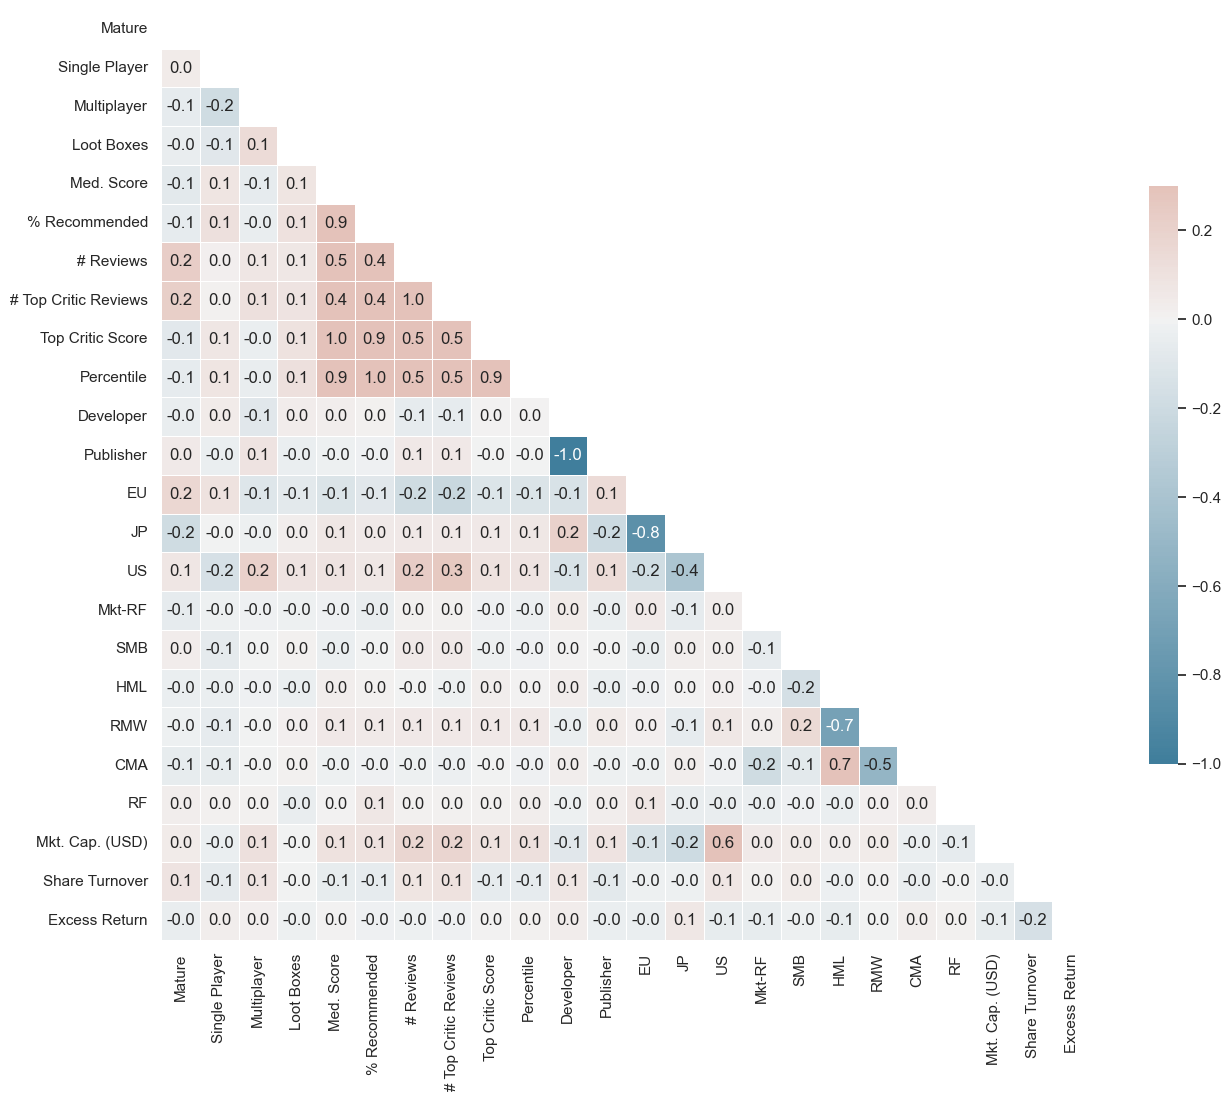

In [503]:
sns.set_theme(style="white")

label = [
        'Mature',
        'Single Player',
        'Multiplayer',
        'Loot Boxes',
        'Med. Score',
        '% Recommended',
        '# Reviews',
        '# Top Critic Reviews',
        'Top Critic Score',
        'Percentile',
        'Developer',
        'Publisher',
        'EU',
        'JP',
        'US',
        'Mkt-RF',
        'SMB',
        'HML',
        'RMW',
        'CMA',
        'RF',
        'Mkt. Cap. (USD)',
        'Share Turnover',
        'Excess Return'
        ]
# Generate a mask for the upper triangle
mask = np.triu(np.ones_like(corr_matrix, dtype=bool))

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(15, 15))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(230, 20, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(
    corr_matrix,
    mask=mask,
    cmap=cmap,
    vmax=.3,
    center=0,
    square=True,
    linewidths=.5,
    cbar_kws={"shrink": .5},
    xticklabels=label,
    yticklabels=label,
    annot=True,
    fmt=".1f"
      )
f.savefig('correlation_matrix_heatmap.png')

In [504]:
def subplot_hist(df, variables, num_columns, x_labels, share_y_axis, image_name, **kwargs):

    titles = kwargs.get('titles', None)
    suptitle = kwargs.get('suptitle', None)
    num_bins = kwargs.get('bins', None)
    figure_size = kwargs.get('figure_size', None)
    y_label_plots = kwargs.get('y_label_plots', None)
    special = kwargs.get('special', None)

    if not figure_size:
        figure_size = (9,9)

    # Calculate the number of subplots based on how many X values being compared.
    num_subplots = len(variables)

    # Calculate how many rows there should be per column.
    rows = math.ceil(num_subplots/num_columns)
    # Number of columns provided as an input.
    cols = num_columns
    fig, axs = plt.subplots(rows, cols, sharey=share_y_axis, figsize = figure_size)
    if rows*cols> num_subplots:
        fig.delaxes(axs.flatten()[-1])
    if suptitle:
        fig.suptitle(suptitle)

    for i, ax in enumerate(axs.flat):

        if special:
            if i == special[0] and special[1]:
                num_bins = special[2]
            else:
                num_bins = num_bins = kwargs.get('bins', None)
        try:
            if i > num_subplots -1 :
                continue
            bin_size = (max(df[variables[i]]) - min(df[variables[i]]))/num_bins
            y = df[variables[i]]
            sns.histplot(
                y,
                kde=True,
                ax=ax,
                binwidth=bin_size,
                edgecolor='black',
                color='gray')
            if titles != None:
                ax.set_title(titles[i])
            if x_labels != None:
                ax.set_xlabel(x_labels[i])
            if y_label_plots:
                if i in y_label_plots:
                    ax.set_ylabel('Count')
                else:
                    ax.set_ylabel('')

        except KeyError:
            print('Too many indices.')
            continue
    fig.savefig(image_name) 

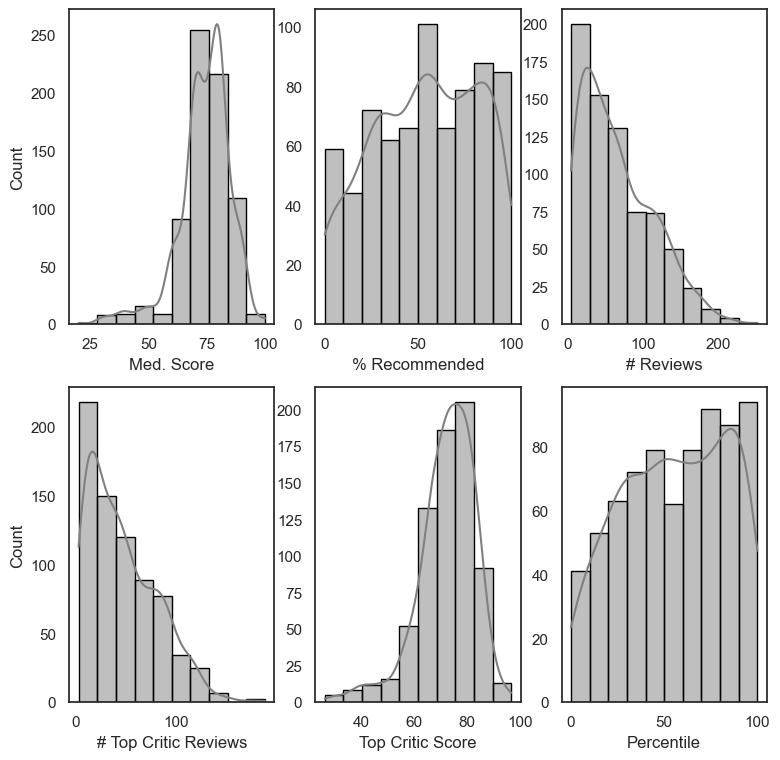

In [505]:
# Plot histograms of review metrics.
subplot_hist(
    df=games_returns_release_df,
    variables=[
        'medianScore',
        'percentRecommended',
        'numReviews',
        'numTopCriticReviews',
        'topCriticScore',
        'percentile'
        ],
    num_columns=3,
    x_labels=[
        'Med. Score',
        '% Recommended',
        '# Reviews',
        '# Top Critic Reviews',
        'Top Critic Score',
        'Percentile'
        ],
    share_y_axis=False,
    bins=10,
    image_name='review_metrics_distributions.png',
    y_label_plots=[0,3]
    )

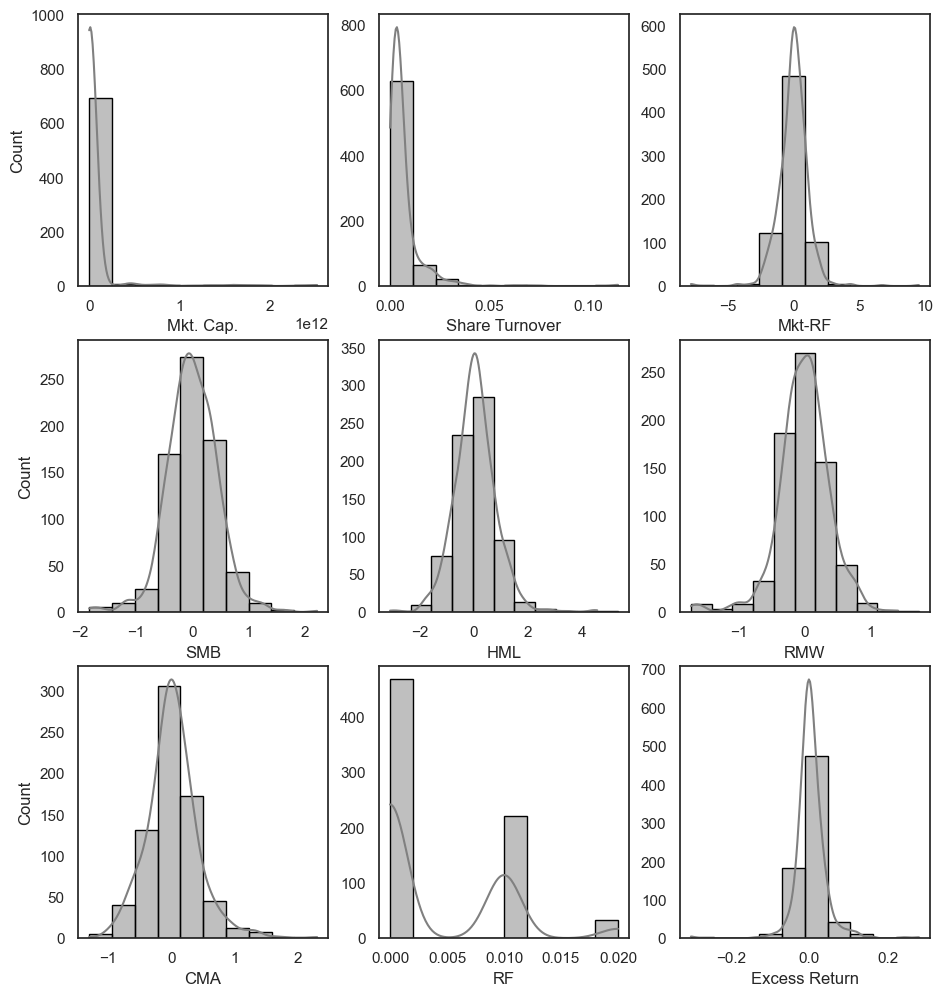

In [506]:
# Plot histograms of review metrics.
subplot_hist(
    df=games_returns_release_df[games_returns_release_df['excess_return'] < 3.0],
    variables=[
        'mkt_cap_usd',
        'volume_to_shares_outstanding',
        'mkt-rf',
        'smb',
        'hml',
        'rmw',
        'cma',
        'rf',
        'excess_return'
        ],
    num_columns=3,
    x_labels=[
        'Mkt. Cap.',
        'Share Turnover',
        'Mkt-RF',
        'SMB',
        'HML',
        'RMW',
        'CMA',
        'RF',
        'Excess Return'
        ],
    share_y_axis=False,
    bins=10,
    image_name='financial_metrics_distributions.png',
    figure_size = (11,12),
    y_label_plots=[0,3,6]
    )

In [507]:
games_returns_release_df.columns

Index(['name', 'mature', 'single_player', 'multiplayer', 'dist',
       'hasLootBoxes', 'percentRecommended', 'numReviews',
       'numTopCriticReviews', 'medianScore', 'topCriticScore', 'percentile',
       'developer', 'publisher', 'stock_id', 'date', 'company_name', 'eu',
       'jp', 'us', 'mkt-rf', 'smb', 'hml', 'rmw', 'cma', 'rf', 'excess_return',
       'mkt_cap_usd', 'volume_to_shares_outstanding', 'sizeMedianScore',
       'turnoverMedianScore', 'sizeTopCriticScore', 'turnoverTopCriticScore',
       'numMedianScore', 'numTopCriticScore'],
      dtype='object')

In [508]:
def subplot_bar(df, variables, num_columns, x_labels, legend_labels, **kwargs):

    titles = kwargs.get('titles', None)
    suptitle = kwargs.get('suptitle', None)
    colours = kwargs.get('colours', None)
    bar_labels = kwargs.get('bar_labels', None)
    figure_size = kwargs.get('figure_size', None)
    y_label_plots = kwargs.get('y_label_plots', None)

    if not figure_size:
        figure_size = (9,9)

    # Calculate the number of subplots based on how many X values being compared.
    num_subplots = len(variables)

    rows = math.ceil(num_subplots/num_columns)
    cols = num_columns
    fig, axs = plt.subplots(rows, cols, sharey=True, figsize = figure_size)
    if rows*cols> num_subplots:
        fig.delaxes(axs.flatten()[-1])

    if suptitle != None:
        fig.suptitle(suptitle)

    for i, ax in enumerate(fig.axes):
        try:
            y = df[variables[i]]
            if colours != None:
                p = ax.bar(
                    bar_labels[i],
                    y.value_counts(),
                    label=legend_labels[i],
                    colors=colours[i]
                )
                ax.bar_label(p, label_type='center')
            else:
                p = ax.bar(
                    bar_labels[i],
                    y.value_counts(),
                    label=legend_labels[i],
                    color=(0.1, 0.1, 0.1, 0.1),
                    edgecolor='k'
                )
                ax.bar_label(p, label_type='center')
            if titles != None:
                ax.set_title(titles[i])
            if x_labels != None:
                ax.set_xlabel(x_labels[i])
            if y_label_plots:
                if i in y_label_plots:
                    ax.set_ylabel('Count')
                else:
                    ax.set_ylabel('')

        except KeyError:
            print('Too many indices.')
            continue

    fig.savefig('games_categorical_barchart.png') 

In [509]:
def add_region_name(eu_bool, jp_bool, us_bool):
    if eu_bool:
        return 'eu'
    elif jp_bool:
        return 'jp'
    else:
        return 'us'

In [510]:
def add_dev_pub(dev_bool, pub_bool):
    if dev_bool:
        return 'developer'
    elif pub_bool:
        return 'publisher'
    else:
        return 'neither'

In [511]:
def add_mature(mature_bool):
    if mature_bool:
        return 'mature'
    elif not mature_bool:
        return 'other'
    else:
        return 'neither'

In [512]:
def add_multiplayer(multi_bool):
    if multi_bool:
        return 'Multiplayer'
    else:
        return 'Single Player'

In [513]:
games_returns_release_df['region'] = games_returns_release_df.apply(lambda x: add_region_name(eu_bool=x['eu'], jp_bool=x['jp'], us_bool=x['us']), axis=1)
games_returns_release_df['dev_pub'] = games_returns_release_df.apply(lambda x: add_dev_pub(dev_bool=x['developer'], pub_bool=x['publisher']), axis=1)
games_returns_release_df['age_rating'] = games_returns_release_df['mature'].map(add_mature)
games_returns_release_df['players'] = games_returns_release_df['multiplayer'].map(add_multiplayer)

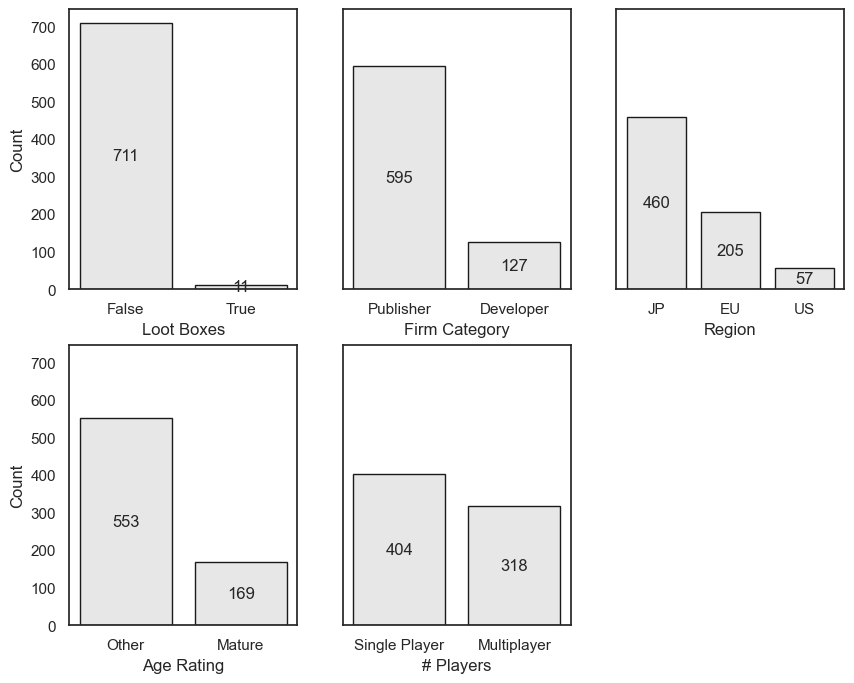

In [514]:
subplot_bar(
    df=games_returns_release_df,
    variables=[
        'hasLootBoxes',
        'dev_pub',
        'region',
        'age_rating',
        'players'
    ],
    num_columns=3,
    x_labels=[
        'Loot Boxes',
        'Firm Category',
        'Region',
        'Age Rating',
        '# Players'
    ],
    legend_labels=[
        'Loot Boxes',
        'Firm Category',
        'Region',
        'Age Rating',
        '# Players'
    ],
    bar_labels=[
        ['False', 'True'],
        ['Publisher', 'Developer'],
        ['JP', 'EU', 'US'],
        ['Other', 'Mature'],
        ['Single Player', 'Multiplayer']
    ],
    figure_size=(10,8),
    y_label_plots=[0,3]
    )

In [515]:
games_returns_release_df[(games_returns_release_df['single_player'] == True) & (games_returns_release_df['multiplayer'] == True)]

,name,mature,single_player,multiplayer,dist,hasLootBoxes,percentRecommended,numReviews,numTopCriticReviews,medianScore,...,sizeMedianScore,turnoverMedianScore,sizeTopCriticScore,turnoverTopCriticScore,numMedianScore,numTopCriticScore,region,dev_pub,age_rating,players
2,One Punch Man: A Hero Nobody Knows,0,1,1,0.0,0,17.105263,76.0,52.0,60.0,...,6.842457e+11,0.337270,6.676986e+11,0.329114,3044.549020,4560.0,jp,publisher,other,Multiplayer
5,One Piece: Pirate Warriors 4,0,1,1,0.0,0,65.789474,76.0,57.0,75.0,...,2.251316e+11,0.168487,2.247564e+11,0.168206,4267.875000,5700.0,jp,developer,other,Multiplayer
6,One Piece: Pirate Warriors 4,0,1,1,0.0,0,65.789474,76.0,57.0,75.0,...,8.132667e+11,0.401318,8.119112e+11,0.400649,4267.875000,5700.0,jp,publisher,other,Multiplayer
10,Zumba: Burn it Up!,0,1,1,0.0,0,60.000000,5.0,5.0,70.0,...,1.521884e+10,1.769006,1.500143e+10,1.743735,345.000000,350.0,eu,publisher,other,Multiplayer
14,Humankind,0,1,1,0.0,0,61.538462,53.0,39.0,80.0,...,2.646723e+11,0.258123,2.629734e+11,0.256466,3099.972973,4240.0,jp,publisher,other,Multiplayer
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
713,Dragon Quest Heroes II,0,1,1,0.0,0,62.500000,72.0,63.0,80.0,...,3.157297e+11,0.910617,3.085882e+11,0.890020,4926.000000,5760.0,jp,publisher,other,Multiplayer
714,Pokémon Scarlet,0,1,1,0.0,0,47.154472,127.0,87.0,70.0,...,3.847428e+12,0.334787,3.923612e+12,0.341416,6210.588608,8890.0,jp,publisher,other,Multiplayer
716,Pokémon Violet,0,1,1,0.0,0,47.154472,127.0,87.0,70.0,...,3.847428e+12,0.334787,3.923612e+12,0.341416,6210.588608,8890.0,jp,publisher,other,Multiplayer
718,Dr Kawashima's Brain Training for Nintendo Switch,0,1,1,0.0,0,29.411765,22.0,19.0,70.0,...,3.684578e+12,0.339184,3.502373e+12,0.322411,1264.230769,1540.0,jp,publisher,other,Multiplayer


In [516]:
columns = [
    'mature',                      # 0
    'single_player',               # 1
    'multiplayer',                 # 2
    'hasLootBoxes',                # 3
    'medianScore',                 # 4
    'percentRecommended',          # 5
    'numReviews',                  # 6
    'numTopCriticReviews',         # 7
    'topCriticScore',              # 8
    'percentile',                  # 9
    'developer',                   # 10
    'publisher',                   # 11
    'eu',                          # 12
    'jp',                          # 13
    'us',                          # 14
    'mkt-rf',                      # 15
    'smb',                         # 16
    'hml',                         # 17
    'rmw',                         # 18
    'cma',                         # 19
    'rf',                          # 20
    'mkt_cap_usd',                 # 21
    'volume_to_shares_outstanding', # 22
    'sizeMedianScore',              # 23
    'turnoverMedianScore',          # 24
    'sizeTopCriticScore',           # 25
    'turnoverTopCriticScore',       # 26
    'numMedianScore',               # 27
    'numTopCriticScore'             # 28
  ]

In [517]:
games_returns_release_df[games_returns_release_df['excess_return'] > 3]

,name,mature,single_player,multiplayer,dist,hasLootBoxes,percentRecommended,numReviews,numTopCriticReviews,medianScore,...,sizeMedianScore,turnoverMedianScore,sizeTopCriticScore,turnoverTopCriticScore,numMedianScore,numTopCriticScore,region,dev_pub,age_rating,players


Create a log return column for running the regressions.

In [518]:
games_returns_release_df['log_excess_ret'] = np.log(games_returns_release_df['excess_return'] + 1)

# Univariate Regression

In [519]:
# df = games_returns_release_df[games_returns_release_df['excess_return'] < 3]
df = games_returns_release_df

mature = sm.OLS(endog=df['log_excess_ret'], exog=sm.add_constant(df['mature'])).fit()
singlePlayer = sm.OLS(endog=df['log_excess_ret'], exog=sm.add_constant(df['single_player'])).fit()
lootBoxes = sm.OLS(endog=df['log_excess_ret'], exog=sm.add_constant(df['hasLootBoxes'])).fit()
medianScore = sm.OLS(endog=df['log_excess_ret'], exog=sm.add_constant(df['medianScore'])).fit()
numReviews = sm.OLS(endog=df['log_excess_ret'], exog=sm.add_constant(df['numReviews'])).fit()
numTopCriticReviews = sm.OLS(endog=df['log_excess_ret'], exog=sm.add_constant(df['numTopCriticReviews'])).fit()
topCriticScore = sm.OLS(endog=df['log_excess_ret'], exog=sm.add_constant(df['topCriticScore'])).fit()
publisher = sm.OLS(endog=df['log_excess_ret'], exog=sm.add_constant(df['publisher'])).fit()
combined = sm.OLS(endog=df['log_excess_ret'], exog=sm.add_constant(df[[
    'mature',
    'single_player',
    'publisher',
    'hasLootBoxes',
    'medianScore',
    'numReviews',
    'numTopCriticReviews',
    'topCriticScore'
    ]])).fit()


stargazer = Stargazer([
    mature,
    singlePlayer,
    lootBoxes,
    medianScore,
    numReviews,
    numTopCriticReviews,
    topCriticScore,
    publisher
    ]
)

stargazer.covariate_order([
    'mature',
    'single_player',
    'hasLootBoxes',
    'medianScore',
    'numReviews',
    'numTopCriticReviews',
    'topCriticScore',
    'publisher',
    'const'
    # 'eu',                          # 12
    # 'jp',                          # 13
    # 'us',                          # 14
    # 'mkt-rf',                      # 15
    # 'smb',                         # 16
    # 'hml',                         # 17
    # 'rmw',                         # 18
    # 'cma',                         # 19
    # 'rf',                          # 20
    # 'mkt_cap_usd',                 # 21
    # 'volume_to_shares_outstanding' # 22
  ])

stargazer.rename_covariates({
    'mature': 'Mature',
    'single_player':'Single Player',
    'hasLootBoxes': 'Loot Boxes',
    'medianScore': 'Med. Score',
    'numReviews': '\# Reviews',
    'numTopCriticReviews': '\# Top Critic Reviews',
    'topCriticScore': 'Top Critic Score',
    'publisher': 'Publisher',
    'const': 'Const.'
    }
  )

stargazer.significant_digits(5)

print(stargazer.render_latex())

\begin{table}[!htbp] \centering
\begin{tabular}{@{\extracolsep{5pt}}lcccccccc}
\\[-1.8ex]\hline
\hline \\[-1.8ex]
& \multicolumn{8}{c}{\textit{Dependent variable:}} \
\cr \cline{8-9}
\\[-1.8ex] & (1) & (2) & (3) & (4) & (5) & (6) & (7) & (8) \\
\hline \\[-1.8ex]
 Mature & -0.005$^{}$ & & & & & & & \\
  & (0.003) & & & & & & & \\
 Single Player & & 0.004$^{}$ & & & & & & \\
  & & (0.008) & & & & & & \\
 Loot Boxes & & & -0.005$^{}$ & & & & & \\
  & & & (0.012) & & & & & \\
 Med. Score & & & & 0.000$^{}$ & & & & \\
  & & & & (0.000) & & & & \\
 \# Reviews & & & & & -0.000$^{}$ & & & \\
  & & & & & (0.000) & & & \\
 \# Top Critic Reviews & & & & & & -0.000$^{}$ & & \\
  & & & & & & (0.000) & & \\
 Top Critic Score & & & & & & & 0.000$^{}$ & \\
  & & & & & & & (0.000) & \\
 Publisher & & & & & & & & -0.003$^{}$ \\
  & & & & & & & & (0.004) \\
 Const. & 0.004$^{**}$ & -0.002$^{}$ & 0.003$^{*}$ & -0.000$^{}$ & 0.004$^{}$ & 0.003$^{}$ & -0.001$^{}$ & 0.005$^{}$ \\
  & (0.002) & (0.007) & (0.0

Create interaction variables between proposed metrics and size.

In [520]:
games_returns_release_df['sizeMedianScore'] = games_returns_release_df['mkt_cap_usd'] * games_returns_release_df['medianScore']
games_returns_release_df['turnoverMedianScore'] = games_returns_release_df['volume_to_shares_outstanding'] * games_returns_release_df['medianScore']
games_returns_release_df['sizeTopCriticScore'] = games_returns_release_df['mkt_cap_usd'] * games_returns_release_df['topCriticScore']
games_returns_release_df['turnoverTopCriticScore'] = games_returns_release_df['volume_to_shares_outstanding'] * games_returns_release_df['topCriticScore']
games_returns_release_df['numMedianScore'] = games_returns_release_df['numTopCriticReviews'] * games_returns_release_df['topCriticScore']
games_returns_release_df['numTopCriticScore'] = games_returns_release_df['numReviews'] * games_returns_release_df['medianScore']



In [521]:
df = games_returns_release_df

sizeMedianScore = sm.OLS(endog=df['log_excess_ret'], exog=sm.add_constant(df[columns[23]])).fit()
turnoverMedianScore = sm.OLS(endog=df['log_excess_ret'], exog=sm.add_constant(df[columns[24]])).fit()
sizeTopCriticScore = sm.OLS(endog=df['log_excess_ret'], exog=sm.add_constant(df[columns[25]])).fit()
turnoverTopCriticScore = sm.OLS(endog=df['log_excess_ret'], exog=sm.add_constant(df[columns[26]])).fit()
numMedianScore = sm.OLS(endog=df['log_excess_ret'], exog=sm.add_constant(df[columns[27]])).fit()
numTopCriticScore = sm.OLS(endog=df['log_excess_ret'], exog=sm.add_constant(df[columns[28]])).fit()

stargazer = Stargazer([
    sizeMedianScore,
    turnoverMedianScore,
    sizeTopCriticScore,
    turnoverTopCriticScore,
    numMedianScore,
    numTopCriticScore
    ]
)

stargazer.covariate_order([
    'sizeMedianScore',
    'turnoverMedianScore',
    'sizeTopCriticScore',
    'turnoverTopCriticScore',
    'numMedianScore',
    'numTopCriticScore',
    'const'
    ]
  )

stargazer.rename_covariates({
    'sizeMedianScore': 'Size x Med. Score',
    'turnoverMedianScore':'Share T/O x Med. Score',
    'sizeTopCriticScore': 'Size x Top Critic Score',
    'turnoverTopCriticScore': 'Share T/O x Top Critic Score',
    'numMedianScore': '\# Reviews x Med. Score',
    'numTopCriticScore': '\# Top Critic Reviews x Top Critic Score',
    'const': 'Const.'
    }
  )
stargazer.significant_digits(5)

print(stargazer.render_latex())

\begin{table}[!htbp] \centering
\begin{tabular}{@{\extracolsep{5pt}}lcccccc}
\\[-1.8ex]\hline
\hline \\[-1.8ex]
& \multicolumn{6}{c}{\textit{Dependent variable:}} \
\cr \cline{6-7}
\\[-1.8ex] & (1) & (2) & (3) & (4) & (5) & (6) \\
\hline \\[-1.8ex]
 Size x Med. Score & -0.000$^{}$ & & & & & \\
  & (0.000) & & & & & \\
 Share T/O x Med. Score & & -0.010$^{***}$ & & & & \\
  & & (0.002) & & & & \\
 Size x Top Critic Score & & & -0.000$^{}$ & & & \\
  & & & (0.000) & & & \\
 Share T/O x Top Critic Score & & & & -0.010$^{***}$ & & \\
  & & & & (0.002) & & \\
 \# Reviews x Med. Score & & & & & -0.000$^{}$ & \\
  & & & & & (0.000) & \\
 \# Top Critic Reviews x Top Critic Score & & & & & & -0.000$^{}$ \\
  & & & & & & (0.000) \\
 Const. & 0.003$^{**}$ & 0.007$^{***}$ & 0.003$^{**}$ & 0.007$^{***}$ & 0.003$^{}$ & 0.003$^{}$ \\
  & (0.001) & (0.002) & (0.001) & (0.002) & (0.002) & (0.002) \\
\hline \\[-1.8ex]
 Observations & 722 & 722 & 722 & 722 & 722 & 722 \\
 $R^2$ & 0.002 & 0.025 & 0.002 & 

# Multivariate Regression

In [535]:
# Run the same regressions but leaving out the outlier excess return.
df = games_returns_release_df

proposed_only = sm.OLS(endog=df['log_excess_ret'], exog=sm.add_constant(df[[
    'topCriticScore',
    'turnoverTopCriticScore',
    'numTopCriticReviews',

  ]])).fit()
game_related_only = sm.OLS(endog=df['log_excess_ret'], exog=sm.add_constant(df[[
    'single_player',
    'hasLootBoxes',
    'publisher'
  ]])).fit()
financial_only = sm.OLS(endog=df['log_excess_ret'], exog=sm.add_constant(df[[
  'volume_to_shares_outstanding',
  'mkt-rf',
    'smb',
    'hml',
    'rmw',
    'cma'
]])).fit()
combined = sm.OLS(endog=df['log_excess_ret'], exog=sm.add_constant(df[[
  'topCriticScore',
  'turnoverTopCriticScore',
  'single_player',
  'hasLootBoxes',
  'publisher',
  'volume_to_shares_outstanding',
  'mkt-rf',
  'smb',
  'hml',
  'rmw',
  'cma'
  ]])).fit()

stargazer = Stargazer([
    proposed_only,
    game_related_only,
    financial_only,
    combined
    ]
)

stargazer.covariate_order([
  'topCriticScore',
  'turnoverTopCriticScore',
  'numTopCriticReviews',
  'single_player',
  'hasLootBoxes',
  'publisher',
  'volume_to_shares_outstanding',
  'mkt-rf',
  'smb',
  'hml',
  'rmw',
  'cma',
  'const'
  ])

stargazer.rename_covariates({
  'topCriticScore': 'Top Critic Score',
  'turnoverTopCriticScore': 'Share T/O x Top Critic Score',
  'numTopCriticReviews': '\# Top Critic Reviews',
  'single_player': 'Single Player',
  'hasLootBoxes': 'Loot Boxes',
  'publisher': 'Publisher',
  'volume_to_shares_outstanding': 'Share T/O',
  'mkt-rf': 'Mkt-RF',
  'smb': 'SMB',
  'hml': 'HML',
  'rmw': 'RMW',
  'cma': 'CMA',
  'const': 'Const.'
    }
  )


stargazer.custom_columns(['Proposed', 'Game Characeristics', 'Financial', 'Combined'], [1, 1, 1, 1])

stargazer.significant_digits(5)

print(stargazer.render_latex())

\begin{table}[!htbp] \centering
\begin{tabular}{@{\extracolsep{5pt}}lcccc}
\\[-1.8ex]\hline
\hline \\[-1.8ex]
& \multicolumn{4}{c}{\textit{Dependent variable:}} \
\cr \cline{4-5}
\\[-1.8ex] & \multicolumn{1}{c}{Proposed} & \multicolumn{1}{c}{Game Characeristics} & \multicolumn{1}{c}{Financial} & \multicolumn{1}{c}{Combined}  \\
\\[-1.8ex] & (1) & (2) & (3) & (4) \\
\hline \\[-1.8ex]
 Top Critic Score & 0.00009$^{}$ & & & -0.00050$^{***}$ \\
  & (0.00015) & & & (0.00016) \\
 Share T/O x Top Critic Score & -0.01015$^{***}$ & & & 0.07151$^{***}$ \\
  & (0.00235) & & & (0.01214) \\
 \# Top Critic Reviews & -0.00000$^{}$ & & & \\
  & (0.00005) & & & \\
 Single Player & & 0.00382$^{}$ & & -0.00132$^{}$ \\
  & & (0.00763) & & (0.00741) \\
 Loot Boxes & & -0.00520$^{}$ & & -0.00839$^{}$ \\
  & & (0.01203) & & (0.01157) \\
 Publisher & & -0.00314$^{}$ & & -0.00543$^{}$ \\
  & & (0.00386) & & (0.00369) \\
 Share T/O & & & -0.82339$^{***}$ & -5.40246$^{***}$ \\
  & & & (0.14938) & (0.78886) \\
 M

In [523]:
# Run the same regressions but leaving out the outlier excess return.
df = games_returns_release_df[games_returns_release_df['excess_return'] < 3]

proposed_only = sm.OLS(endog=df['log_excess_ret'], exog=sm.add_constant(df[[
    'medianScore',
    'turnoverMedianScore',
    'single_player',
    'multiplayer'
  ]])).fit()
financial_only = sm.OLS(endog=df['log_excess_ret'], exog=sm.add_constant(df[[
  'volume_to_shares_outstanding',
  'mkt-rf',
    'smb',
    'hml',
    'rmw',
    'cma'
]])).fit()
combined = sm.OLS(endog=df['log_excess_ret'], exog=sm.add_constant(df[[
  'medianScore',
  'turnoverMedianScore',
  'single_player',
  'multiplayer',
  'volume_to_shares_outstanding',
  'mkt-rf',
  'smb',
  'hml',
  'rmw',
  'cma'
  ]])).fit()

stargazer = Stargazer([
    proposed_only,
    financial_only,
    combined
    ]
)

stargazer.covariate_order([
  'medianScore',
  'turnoverMedianScore',
  'single_player',
  'multiplayer',
  'volume_to_shares_outstanding',
  'mkt-rf',
  'smb',
  'hml',
  'rmw',
  'cma',
  'const'
  ])

stargazer.rename_covariates({
  'topCriticScore': 'Top Critic Score',
  'turnoverTopCriticScore': 'Share T/O x Top Critic Score',
  'single_player': 'Single Player',
  'multiplayer': 'Multiplayer',
  'volume_to_shares_outstanding': 'Share T/O',
  'mkt-rf': 'Mkt-RF',
  'smb': 'SMB',
  'hml': 'HML',
  'rmw': 'RMW',
  'cma': 'CMA',
  'const': 'Const.'
    }
  )


stargazer.custom_columns(['Proposed', 'Financial', 'Combined'], [1, 1, 1])

print(stargazer.render_latex())

\begin{table}[!htbp] \centering
\begin{tabular}{@{\extracolsep{5pt}}lccc}
\\[-1.8ex]\hline
\hline \\[-1.8ex]
& \multicolumn{3}{c}{\textit{Dependent variable:}} \
\cr \cline{3-4}
\\[-1.8ex] & \multicolumn{1}{c}{Proposed} & \multicolumn{1}{c}{Financial} & \multicolumn{1}{c}{Combined}  \\
\\[-1.8ex] & (1) & (2) & (3) \\
\hline \\[-1.8ex]
 medianScore & 0.000$^{}$ & & -0.001$^{***}$ \\
  & (0.000) & & (0.000) \\
 turnoverMedianScore & -0.010$^{***}$ & & 0.075$^{***}$ \\
  & (0.002) & & (0.012) \\
 Single Player & 0.003$^{}$ & & 0.001$^{}$ \\
  & (0.008) & & (0.007) \\
 Multiplayer & 0.002$^{}$ & & 0.003$^{}$ \\
  & (0.003) & & (0.003) \\
 Share T/O & & -0.823$^{***}$ & -5.799$^{***}$ \\
  & & (0.149) & (0.799) \\
 Mkt-RF & & -0.001$^{}$ & -0.001$^{}$ \\
  & & (0.001) & (0.001) \\
 SMB & & -0.002$^{}$ & -0.003$^{}$ \\
  & & (0.003) & (0.003) \\
 HML & & -0.010$^{***}$ & -0.011$^{***}$ \\
  & & (0.003) & (0.003) \\
 RMW & & -0.007$^{}$ & -0.007$^{}$ \\
  & & (0.005) & (0.005) \\
 CMA & & 0.0

In [539]:
(np.exp(0.07151)-1)*100

7.412889193652705

In [537]:
0.05*80

4.0